In [1]:
%matplotlib inline

In [26]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pandas as pd
import numpy as np
import statistics
import scipy.stats as sts

In [3]:
# import our csv files with the data to analyze
city_data_df = pd.read_csv("city_data.csv")
ride_data_df = pd.read_csv("ride_data.csv")

In [4]:
# Get the columns and the rows that are not null for city data.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [5]:
# Get the data types of each column in city data.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
list_of_type = city_data_df['type'].unique()
list_of_type

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
for type in list_of_type:
    type_total = sum(city_data_df['type'] == type)
    print(f"{type}: {type_total}")

Urban: 66
Suburban: 36
Rural: 18


In [8]:
# Get the columns and the rows that are not null for ride data.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [9]:
# Get the data types of each column in ride data.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [10]:
# merge city and ride dfs
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = 'left', on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [11]:
# make three new dataframes- one for Urban, Suburban, and Rural under 'type'
urban_df = pyber_data_df[pyber_data_df["type"] == 'Urban']
suburban_df = pyber_data_df[pyber_data_df["type"] == 'Suburban']
rural_df = pyber_data_df[pyber_data_df["type"] == 'Rural']

In [12]:
# count the number of rides for each city in each type (urban, suburban, rural)
urban_ride_count = urban_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_df.groupby(["city"]).count()["ride_id"]

In [13]:
# get average fare for each city in each type
urban_avg_fare = urban_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_df.groupby(["city"]).mean()["fare"]

In [14]:
# get the average number of drivers for each city in each type
urban_driver_count_avg = urban_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count_avg = suburban_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count_avg = rural_df.groupby(["city"]).mean()["driver_count"]

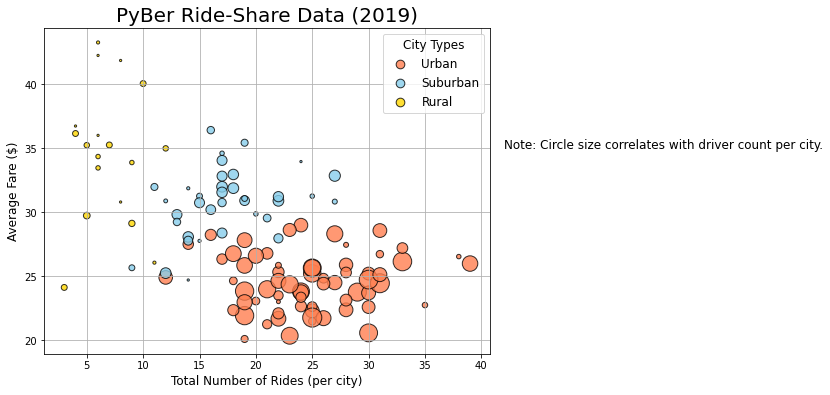

In [16]:
plt.subplots(figsize=(8,6))

plt.scatter(urban_ride_count,urban_avg_fare, s = [i*5 for i in urban_driver_count_avg], c = "coral", edgecolor = "k",
           linewidths=1,alpha=0.8, label="Urban")
plt.scatter(suburban_ride_count,suburban_avg_fare, s = [i * 5 for i in suburban_driver_count_avg], c = "skyblue", 
            edgecolor = "k", linewidths=1,alpha=0.8, label="Suburban")
plt.scatter(rural_ride_count,rural_avg_fare, s = [i*5 for i in rural_driver_count_avg], c = "gold", edgecolor = "k", 
            linewidths=1,alpha=0.8, label="Rural")
plt.xlabel("Total Number of Rides (per city)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.title("PyBer Ride-Share Data (2019)", fontsize=20)
plt.grid()

# create legend, make font size small (12), expand the legen horizontally with mode, choose how many points you want next to
# each type in the legend with scatterpoints, pick the best location for the legend based on where the points in the
# scatterplot fall with loc, add a legend title, make all of the scatterpoints the same size [0] represents the first graph,
# [1] represents the second graph and so on, and lastly make the legend title font size 12
lgnd = plt.legend(fontsize="12" , mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("Fig1.png")

In [29]:
# run statistical analysis on the data to add a story to the bubble chart
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [32]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [38]:
# Get the fares for the urban cities.
urban_fares = urban_df["fare"]

In [36]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [42]:
# Get the fares for the suburban cities.
suburban_fares = suburban_df["fare"]

In [40]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [43]:
# Get the fares for the rural cities.
rural_fares = rural_df["fare"]

In [44]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [45]:
# Get the driver count for urban cities
urban_driver_count = urban_df["driver_count"]

In [52]:
# Calculate the measures of central tendency for the average driver count for the urban cities
mean_urban_driver_count = np.mean(urban_driver_count)
print(f"The mean driver count for urban trips is {mean_urban_driver_count:.2f}")

median_urban_driver_count = np.median(urban_driver_count)
print(f"The median driver count for urban trips is {median_urban_driver_count:.2f}")
      
mode_urban_driver_count = sts.mode(urban_driver_count)
print(f"The mode driver count for urban trips is {mode_urban_driver_count}")

The mean driver count for urban trips is 36.68
The median driver count for urban trips is 37.00
The mode driver count for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86]))


In [50]:
# Get the driver count for suburban cities
suburban_driver_count = suburban_df["driver_count"]

In [53]:
# Calculate the measures of central tendency for the average driver count for the suburban cities
mean_suburban_driver_count = np.mean(suburban_driver_count)
print(f"The mean driver count for suburban trips is {mean_suburban_driver_count:.2f}")

median_suburban_driver_count = np.median(suburban_driver_count)
print(f"The median driver count for suburban trips is {median_suburban_driver_count:.2f}")
      
mode_suburban_driver_count = sts.mode(suburban_driver_count)
print(f"The mode driver count for suburban trips is {mode_suburban_driver_count}")

The mean driver count for suburban trips is 13.71
The median driver count for suburban trips is 16.00
The mode driver count for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79]))


In [54]:
# Get the driver count for rural cities
rural_driver_count = rural_df["driver_count"]

In [55]:
# Calculate the measures of central tendency for the average driver count for the rural cities
mean_rural_driver_count = np.mean(rural_driver_count)
print(f"The mean driver count for rural trips is {mean_rural_driver_count:.2f}")

median_rural_driver_count = np.median(rural_driver_count)
print(f"The median driver count for rural trips is {median_rural_driver_count:.2f}")
      
mode_rural_driver_count = sts.mode(rural_driver_count)
print(f"The mode driver count for rural trips is {mode_rural_driver_count}")

The mean driver count for rural trips is 4.30
The median driver count for rural trips is 4.00
The mode driver count for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32]))
